In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data for Training for "ForTraining_0001.csv".

### Data has two input columns/features/independent variables as numbers called A and B
### 9 mathematical operations have been performed to generate 9 dependent numerical columns
#### They are as below

* Addition = A + B
* Subtraction = A - B
* Multiplication = A * B
* Division = A / B
* Sin(Addition) = sin (A + B)
* Cos(Addition) = cos (A + B)
* sqrt(Addition) = SQRT( A + B) if (A + B) >= 0 or -1.00 if (A +B ) < 0
* 2 ^ Addition = 2 ^ (A +B)
* Log(Addition) = log(A + B)

### Additionally there is a dependent column present for classification training.
* ODD_OR_EVEN(CEIL(A+B)) = If MODULUS of CEIL(A + B) = 0 then "EVEN" else "ODD" [To be used for *classification training *]

In [2]:
Master_DF = pd.read_csv("./ForTraining_0001.csv")

In [3]:
Master_DF

,A,B,Addition,Subtraction,Multiplication,Division,Sin(Addition),Cos(Addition),Sqrt(Addition),2^Addition,Log(Addition),ODD_OR_EVEN(CEIL(A+B))
0,9.93,9.06,18.99,0.87,89.97,1.10,0.14,0.99,4.36,520666.48,1.28,Odd
1,-3.56,3.48,-0.08,-7.04,-12.39,-1.02,-0.08,1.00,-1.00,0.95,-1.00,Even
2,-7.52,8.24,0.72,-15.76,-61.96,-0.91,0.66,0.75,0.85,1.65,-0.14,Odd
3,-1.92,3.37,1.45,-5.29,-6.47,-0.57,0.99,0.12,1.20,2.73,0.16,Even
4,-5.55,7.42,1.87,-12.97,-41.18,-0.75,0.96,-0.29,1.37,3.66,0.27,Even
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.84,6.22,3.38,-9.06,-17.66,-0.46,-0.24,-0.97,1.84,10.41,0.53,Even
9996,-5.01,7.38,2.37,-12.39,-36.97,-0.68,0.70,-0.72,1.54,5.17,0.37,Odd
9997,4.74,-0.18,4.56,4.92,-0.85,-26.33,-0.99,-0.15,2.14,23.59,0.66,Odd
9998,-5.86,-0.03,-5.89,-5.83,0.18,195.33,0.38,0.92,-1.00,0.02,-1.00,Odd


In [169]:
class Training_Tensorflow:
    
    def __init__(self, 
                 A = Master_DF.A, 
                 B = Master_DF.B, 
                 OutputVector=None, 
                 ClassificationOrRegression="Regression"):
        
        self.A = A
        self.B = B
        self.OutputVector = OutputVector
        self.TypeOfTraining = ClassificationOrRegression
        self.Training_DF = None
        self.Test_DF = None
        self.Model = None
        self.Predicted_DF = None
        self.TrainTestSplit()
        
    def TrainTestSplit(self, TestFractionSize=0.2):
        self.Training_DF, self.Test_DF = train_test_split(Master_DF, test_size=TestFractionSize)
        
    def TrainTheModel(self, 
                      DenseNodeSize = 1000, 
                      batch_size=500, 
                      epochs=25, 
                      activation='linear',
                      optimizer='sgd', 
                      loss='mean_squared_error',
                      final_activation='linear'):
        self.Model = tf.keras.Sequential()
        self.Model.add(keras.layers.Dense(DenseNodeSize, activation=activation))
        self.Model.add(keras.layers.Dense(DenseNodeSize/10, activation=activation))
        self.Model.add(keras.layers.Dense(DenseNodeSize/100, activation=activation))
        self.Model.add(keras.layers.Activation(activation=final_activation))
        self.Model.compile(optimizer=optimizer,loss=loss,metrics=[tf.keras.metrics.MeanSquaredLogarithmicError()])
        xs = np.array([(a,b) for a,b in zip(self.Training_DF.A,self.Training_DF.B)])
        ys = np.array(self.Training_DF[self.OutputVector], dtype='float')
        self.Model.fit(xs,ys,batch_size=batch_size,epochs=epochs)
        
    def PredictTheResult(self):
        self.Predicted_DF = pd.DataFrame(columns=['InputVals','PredictedVals','Difference'],dtype='float')
        self.Predicted_DF.InputVals = self.Test_DF[self.OutputVector]
        xs = np.array([(a,b) for a,b in zip(self.Test_DF.A,self.Test_DF.B)])
        self.Predicted_DF.PredictedVals = self.Model.predict(xs)[:len(self.Test_DF)]
        self.Predicted_DF.Difference = self.Predicted_DF.InputVals - self.Predicted_DF.PredictedVals
        
    def PredictOneVal(self, A=None, B=None):
        return np.round(self.Model.predict(np.array([[A,B]]))[0][0],2)
    
    def PlotThePredicted_DF(self):
        plt.figure()
        plt.plot(range(len(self.Test_DF)),self.Predicted_DF.Difference)
        plt.show()

# Let us try to see if we can learn addition behavior between A and B

In [170]:
AdditionTraining = Training_Tensorflow(OutputVector='Addition')
AdditionTraining.TrainTheModel()

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 0s 49us/sample - loss: 5.2220 - mean_squared_logarithmic_error: 0.1095
Epoch 2/25
8000/8000 [==============================] - 0s 15us/sample - loss: 6.2732e-06 - mean_squared_logarithmic_error: 1.8686e-07
Epoch 3/25
8000/8000 [==============================] - 0s 14us/sample - loss: 1.9232e-06 - mean_squared_logarithmic_error: 8.0862e-08
Epoch 4/25
8000/8000 [==============================] - 0s 14us/sample - loss: 9.4241e-07 - mean_squared_logarithmic_error: 4.0499e-08
Epoch 5/25
8000/8000 [==============================] - 0s 15us/sample - loss: 4.8674e-07 - mean_squared_logarithmic_error: 2.0869e-08
Epoch 6/25
8000/8000 [==============================] - 0s 14us/sample - loss: 2.5936e-07 - mean_squared_logarithmic_error: 1.1246e-08
Epoch 7/25
8000/8000 [==============================] - 0s 15us/sample - loss: 1.4599e-07 - mean_squared_logarithmic_error: 6.1641e-09
Epoch 8/25
8000/8000 [===================

In [171]:
AdditionTraining.PredictOneVal(A=220,B=300)

520.0

In [172]:
AdditionTraining.PredictTheResult()

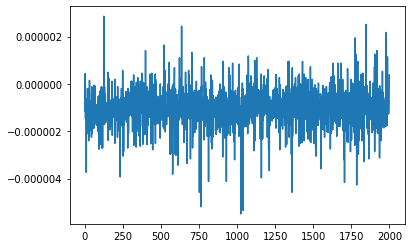

In [173]:
AdditionTraining.PlotThePredicted_DF()

# Let us try to see if we can learn subtraction behavior between A and B

In [174]:
SubtractionTraining = Training_Tensorflow(OutputVector='Subtraction')
SubtractionTraining.TrainTheModel()

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 0s 50us/sample - loss: 4.8974 - mean_squared_logarithmic_error: 0.1079
Epoch 2/25
8000/8000 [==============================] - 0s 15us/sample - loss: 4.7049e-06 - mean_squared_logarithmic_error: 2.1708e-07
Epoch 3/25
8000/8000 [==============================] - 0s 14us/sample - loss: 1.9111e-06 - mean_squared_logarithmic_error: 8.7168e-08
Epoch 4/25
8000/8000 [==============================] - 0s 14us/sample - loss: 8.9276e-07 - mean_squared_logarithmic_error: 4.0721e-08
Epoch 5/25
8000/8000 [==============================] - 0s 15us/sample - loss: 4.2219e-07 - mean_squared_logarithmic_error: 1.9383e-08
Epoch 6/25
8000/8000 [==============================] - 0s 16us/sample - loss: 2.0552e-07 - mean_squared_logarithmic_error: 9.2621e-09
Epoch 7/25
8000/8000 [==============================] - 0s 14us/sample - loss: 1.0394e-07 - mean_squared_logarithmic_error: 4.6979e-09
Epoch 8/25
8000/8000 [===================

In [175]:
SubtractionTraining.PredictOneVal(A=30,B=25)

5.0

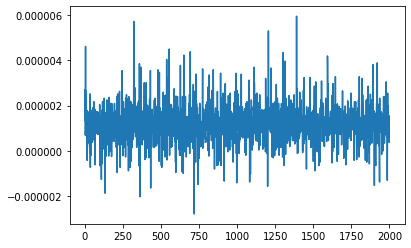

In [176]:
SubtractionTraining.PredictTheResult()
SubtractionTraining.PlotThePredicted_DF()

# Let us try to see if we can learn multiplication behavior between A and B

In [181]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(activation='selu',final_activation='linear')

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 1s 108us/sample - loss: 1008.9642 - mean_squared_logarithmic_error: 3.2491
Epoch 2/25
8000/8000 [==============================] - 0s 23us/sample - loss: 902.5367 - mean_squared_logarithmic_error: 2.7009
Epoch 3/25
8000/8000 [==============================] - 0s 27us/sample - loss: 888.4232 - mean_squared_logarithmic_error: 2.6004
Epoch 4/25
8000/8000 [==============================] - 0s 24us/sample - loss: 889.1266 - mean_squared_logarithmic_error: 2.5976
Epoch 5/25
8000/8000 [==============================] - 0s 23us/sample - loss: 915.4691 - mean_squared_logarithmic_error: 2.6555
Epoch 6/25
8000/8000 [==============================] - 0s 24us/sample - loss: 889.7104 - mean_squared_logarithmic_error: 2.4655
Epoch 7/25
8000/8000 [==============================] - 0s 25us/sample - loss: 879.4402 - mean_squared_logarithmic_error: 2.5069
Epoch 8/25
8000/8000 [==============================] - 0s 22us/sample - 

In [182]:
MultiplicationTraining.PredictOneVal(A=11,B=9)

55.54

In [183]:
MultiplicationTraining.PredictOneVal(A=5,B=6)

40.85

## Looks like it did a very bad job for multiplication. Given the code we can play with three parameters: number of nodes in each Dense layer, optimizer function, activation function and loss function. Let us first change Dense layer number of nodes. Let us double it and see if it helps.

In [184]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(activation='selu',final_activation='linear',DenseNodeSize=2000)

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 1s 102us/sample - loss: 1003.1303 - mean_squared_logarithmic_error: 3.0081
Epoch 2/25
8000/8000 [==============================] - 0s 60us/sample - loss: 915.8705 - mean_squared_logarithmic_error: 2.6057
Epoch 3/25
8000/8000 [==============================] - 0s 62us/sample - loss: 971.0156 - mean_squared_logarithmic_error: 3.1450
Epoch 4/25
8000/8000 [==============================] - 0s 59us/sample - loss: 886.8147 - mean_squared_logarithmic_error: 2.6420
Epoch 5/25
8000/8000 [==============================] - 0s 58us/sample - loss: 887.1153 - mean_squared_logarithmic_error: 2.6198
Epoch 6/25
8000/8000 [==============================] - 1s 71us/sample - loss: 875.6940 - mean_squared_logarithmic_error: 2.5357
Epoch 7/25
8000/8000 [==============================] - 0s 57us/sample - loss: 897.4871 - mean_squared_logarithmic_error: 2.6524
Epoch 8/25
8000/8000 [==============================] - 0s 57us/sample - 

## Looks like it didn't help much in this particular case. Let us go to the optimizer and activation and use adam optimizer + selu activation now and put back the number of nodes in dense layer back to 1000. We will also increase the epochs to 250

In [185]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(optimizer='adam',activation='selu',final_activation='linear',epochs=250)

Train on 8000 samples
Epoch 1/250
8000/8000 [==============================] - 1s 77us/sample - loss: 1030.5103 - mean_squared_logarithmic_error: 2.9451
Epoch 2/250
8000/8000 [==============================] - 0s 24us/sample - loss: 880.2131 - mean_squared_logarithmic_error: 2.5202
Epoch 3/250
8000/8000 [==============================] - 0s 27us/sample - loss: 805.6216 - mean_squared_logarithmic_error: 2.1734
Epoch 4/250
8000/8000 [==============================] - 0s 25us/sample - loss: 770.0408 - mean_squared_logarithmic_error: 1.8350
Epoch 5/250
8000/8000 [==============================] - 0s 24us/sample - loss: 741.8300 - mean_squared_logarithmic_error: 1.6167
Epoch 6/250
8000/8000 [==============================] - 0s 24us/sample - loss: 716.2399 - mean_squared_logarithmic_error: 1.4332
Epoch 7/250
8000/8000 [==============================] - 0s 25us/sample - loss: 690.9781 - mean_squared_logarithmic_error: 1.2342
Epoch 8/250
8000/8000 [==============================] - 0s 34us/sa

8000/8000 [==============================] - 0s 25us/sample - loss: 543.9551 - mean_squared_logarithmic_error: 0.2356
Epoch 126/250
8000/8000 [==============================] - 0s 23us/sample - loss: 543.9459 - mean_squared_logarithmic_error: 0.2358
Epoch 127/250
8000/8000 [==============================] - 0s 23us/sample - loss: 543.9229 - mean_squared_logarithmic_error: 0.2350
Epoch 128/250
8000/8000 [==============================] - 0s 22us/sample - loss: 543.9266 - mean_squared_logarithmic_error: 0.2349
Epoch 129/250
8000/8000 [==============================] - 0s 22us/sample - loss: 543.9075 - mean_squared_logarithmic_error: 0.2346
Epoch 130/250
8000/8000 [==============================] - 0s 22us/sample - loss: 543.9109 - mean_squared_logarithmic_error: 0.2343
Epoch 131/250
8000/8000 [==============================] - 0s 22us/sample - loss: 543.9154 - mean_squared_logarithmic_error: 0.2343
Epoch 132/250
8000/8000 [==============================] - 0s 22us/sample - loss: 543.9354

8000/8000 [==============================] - 0s 25us/sample - loss: 543.8274 - mean_squared_logarithmic_error: 0.2296
Epoch 250/250
8000/8000 [==============================] - 0s 22us/sample - loss: 543.9234 - mean_squared_logarithmic_error: 0.2303


In [186]:
MultiplicationTraining.PredictOneVal(A=11,B=9)

96.02

### Little better but still far off. Let us try to increase the epochs to 1000

In [187]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(optimizer='adam',activation='selu',final_activation='linear',epochs=1000)

Train on 8000 samples
Epoch 1/1000
8000/8000 [==============================] - 1s 77us/sample - loss: 1055.3869 - mean_squared_logarithmic_error: 3.0257
Epoch 2/1000
8000/8000 [==============================] - 0s 24us/sample - loss: 899.8725 - mean_squared_logarithmic_error: 2.0224
Epoch 3/1000
8000/8000 [==============================] - 0s 25us/sample - loss: 779.8357 - mean_squared_logarithmic_error: 1.8874
Epoch 4/1000
8000/8000 [==============================] - 0s 24us/sample - loss: 725.8187 - mean_squared_logarithmic_error: 1.4804
Epoch 5/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 683.3499 - mean_squared_logarithmic_error: 1.1087
Epoch 6/1000
8000/8000 [==============================] - 0s 25us/sample - loss: 663.6136 - mean_squared_logarithmic_error: 1.0040
Epoch 7/1000
8000/8000 [==============================] - 0s 26us/sample - loss: 659.8099 - mean_squared_logarithmic_error: 0.9833
Epoch 8/1000
8000/8000 [==============================] - 0s

Epoch 63/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 518.6098 - mean_squared_logarithmic_error: 0.0483
Epoch 64/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 518.4992 - mean_squared_logarithmic_error: 0.0435
Epoch 65/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 518.4805 - mean_squared_logarithmic_error: 0.0386
Epoch 66/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 518.2896 - mean_squared_logarithmic_error: 0.0353
Epoch 67/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 518.2168 - mean_squared_logarithmic_error: 0.0314
Epoch 68/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 518.0941 - mean_squared_logarithmic_error: 0.0318
Epoch 69/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.9755 - mean_squared_logarithmic_error: 0.0296
Epoch 70/1000
8000/8000 [==============================] - 0s 22us/sample - 

8000/8000 [==============================] - 0s 23us/sample - loss: 517.4032 - mean_squared_logarithmic_error: 0.0047
Epoch 186/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3571 - mean_squared_logarithmic_error: 0.0041
Epoch 187/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3200 - mean_squared_logarithmic_error: 0.0038
Epoch 188/1000
8000/8000 [==============================] - 0s 21us/sample - loss: 517.3333 - mean_squared_logarithmic_error: 0.0040
Epoch 189/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3710 - mean_squared_logarithmic_error: 0.0042
Epoch 190/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3729 - mean_squared_logarithmic_error: 0.0042
Epoch 191/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 517.4253 - mean_squared_logarithmic_error: 0.0042
Epoch 192/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 5

8000/8000 [==============================] - 0s 23us/sample - loss: 517.3272 - mean_squared_logarithmic_error: 0.0022
Epoch 308/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3439 - mean_squared_logarithmic_error: 0.0023
Epoch 309/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3007 - mean_squared_logarithmic_error: 0.0017
Epoch 310/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3040 - mean_squared_logarithmic_error: 0.0018
Epoch 311/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2899 - mean_squared_logarithmic_error: 0.0016
Epoch 312/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3050 - mean_squared_logarithmic_error: 0.0018
Epoch 313/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2986 - mean_squared_logarithmic_error: 0.0018
Epoch 314/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 5

8000/8000 [==============================] - 0s 26us/sample - loss: 517.3092 - mean_squared_logarithmic_error: 0.0013
Epoch 430/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2850 - mean_squared_logarithmic_error: 9.5612e-04
Epoch 431/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2715 - mean_squared_logarithmic_error: 9.3918e-04
Epoch 432/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2786 - mean_squared_logarithmic_error: 9.4135e-04
Epoch 433/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 517.2762 - mean_squared_logarithmic_error: 9.6375e-04
Epoch 434/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2687 - mean_squared_logarithmic_error: 8.5824e-04
Epoch 435/1000
8000/8000 [==============================] - 0s 21us/sample - loss: 517.2714 - mean_squared_logarithmic_error: 8.7791e-04
Epoch 436/1000
8000/8000 [==============================] - 

8000/8000 [==============================] - 0s 25us/sample - loss: 517.2654 - mean_squared_logarithmic_error: 6.2857e-04
Epoch 550/1000
8000/8000 [==============================] - 0s 24us/sample - loss: 517.2839 - mean_squared_logarithmic_error: 7.9012e-04
Epoch 551/1000
8000/8000 [==============================] - 0s 25us/sample - loss: 517.3519 - mean_squared_logarithmic_error: 0.0014
Epoch 552/1000
8000/8000 [==============================] - 0s 25us/sample - loss: 517.2961 - mean_squared_logarithmic_error: 8.7093e-04
Epoch 553/1000
8000/8000 [==============================] - 0s 25us/sample - loss: 517.3396 - mean_squared_logarithmic_error: 0.0014
Epoch 554/1000
8000/8000 [==============================] - 0s 24us/sample - loss: 517.2822 - mean_squared_logarithmic_error: 8.1150e-04
Epoch 555/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2700 - mean_squared_logarithmic_error: 6.7272e-04
Epoch 556/1000
8000/8000 [==============================] - 0s 2

8000/8000 [==============================] - 0s 23us/sample - loss: 517.2676 - mean_squared_logarithmic_error: 5.1453e-04
Epoch 670/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2678 - mean_squared_logarithmic_error: 5.5985e-04
Epoch 671/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 517.2854 - mean_squared_logarithmic_error: 6.6199e-04
Epoch 672/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2865 - mean_squared_logarithmic_error: 7.5050e-04
Epoch 673/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3062 - mean_squared_logarithmic_error: 8.0255e-04
Epoch 674/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3516 - mean_squared_logarithmic_error: 0.0015
Epoch 675/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.4126 - mean_squared_logarithmic_error: 0.0019
Epoch 676/1000
8000/8000 [==============================] - 0s 2

8000/8000 [==============================] - 0s 25us/sample - loss: 517.2845 - mean_squared_logarithmic_error: 6.4131e-04
Epoch 790/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3200 - mean_squared_logarithmic_error: 9.9784e-04
Epoch 791/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3583 - mean_squared_logarithmic_error: 0.0013
Epoch 792/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2875 - mean_squared_logarithmic_error: 5.3676e-04
Epoch 793/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3045 - mean_squared_logarithmic_error: 7.7999e-04
Epoch 794/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 517.2774 - mean_squared_logarithmic_error: 5.4602e-04
Epoch 795/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 517.2651 - mean_squared_logarithmic_error: 4.3741e-04
Epoch 796/1000
8000/8000 [==============================] - 

8000/8000 [==============================] - 0s 24us/sample - loss: 517.3303 - mean_squared_logarithmic_error: 0.0010
Epoch 910/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2702 - mean_squared_logarithmic_error: 4.1950e-04
Epoch 911/1000
8000/8000 [==============================] - 0s 25us/sample - loss: 517.2660 - mean_squared_logarithmic_error: 3.6028e-04
Epoch 912/1000
8000/8000 [==============================] - 0s 32us/sample - loss: 517.2695 - mean_squared_logarithmic_error: 4.4476e-04
Epoch 913/1000
8000/8000 [==============================] - 0s 26us/sample - loss: 517.2691 - mean_squared_logarithmic_error: 3.7378e-04
Epoch 914/1000
8000/8000 [==============================] - 0s 24us/sample - loss: 517.2664 - mean_squared_logarithmic_error: 3.9434e-04
Epoch 915/1000
8000/8000 [==============================] - 0s 24us/sample - loss: 517.2693 - mean_squared_logarithmic_error: 4.2590e-04
Epoch 916/1000
8000/8000 [==============================] - 

In [188]:
MultiplicationTraining.PredictOneVal(A=11,B=9)

96.41

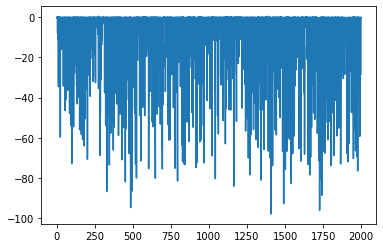

In [190]:
MultiplicationTraining.PredictTheResult()
MultiplicationTraining.PlotThePredicted_DF()

### As you can see it is relatively difficult. Why don't you play with it and find out a good solution?

### Let us move to Sin and Cos

In [191]:
SinTraining = Training_Tensorflow(OutputVector='Sin(Addition)')
SinTraining.TrainTheModel(activation='selu',final_activation='tanh',epochs=250)

Train on 8000 samples
Epoch 1/250
8000/8000 [==============================] - 1s 70us/sample - loss: 0.6639 - mean_squared_logarithmic_error: 0.1247
Epoch 2/250
8000/8000 [==============================] - 0s 23us/sample - loss: 0.5205 - mean_squared_logarithmic_error: 0.1149
Epoch 3/250
8000/8000 [==============================] - 0s 23us/sample - loss: 0.5140 - mean_squared_logarithmic_error: 0.1128
Epoch 4/250
8000/8000 [==============================] - 0s 25us/sample - loss: 0.5083 - mean_squared_logarithmic_error: 0.1123
Epoch 5/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.5017 - mean_squared_logarithmic_error: 0.1138
Epoch 6/250
8000/8000 [==============================] - 0s 23us/sample - loss: 0.5031 - mean_squared_logarithmic_error: 0.1139
Epoch 7/250
8000/8000 [==============================] - 0s 23us/sample - loss: 0.5034 - mean_squared_logarithmic_error: 0.1136
Epoch 8/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.

8000/8000 [==============================] - 0s 28us/sample - loss: 0.4774 - mean_squared_logarithmic_error: 0.1140
Epoch 128/250
8000/8000 [==============================] - 0s 23us/sample - loss: 0.4802 - mean_squared_logarithmic_error: 0.1136
Epoch 129/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4783 - mean_squared_logarithmic_error: 0.1144
Epoch 130/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4772 - mean_squared_logarithmic_error: 0.1140
Epoch 131/250
8000/8000 [==============================] - 0s 25us/sample - loss: 0.4774 - mean_squared_logarithmic_error: 0.1141
Epoch 132/250
8000/8000 [==============================] - 0s 24us/sample - loss: 0.4777 - mean_squared_logarithmic_error: 0.1140
Epoch 133/250
8000/8000 [==============================] - 0s 23us/sample - loss: 0.4771 - mean_squared_logarithmic_error: 0.1132
Epoch 134/250
8000/8000 [==============================] - 0s 24us/sample - loss: 0.4769 - mean_squared_

In [192]:
CosTraining = Training_Tensorflow(OutputVector='Cos(Addition)')
CosTraining.TrainTheModel(activation='selu',final_activation='tanh',epochs=250)

Train on 8000 samples
Epoch 1/250
8000/8000 [==============================] - 1s 68us/sample - loss: 0.5645 - mean_squared_logarithmic_error: 0.1187
Epoch 2/250
8000/8000 [==============================] - 0s 24us/sample - loss: 0.5124 - mean_squared_logarithmic_error: 0.1158
Epoch 3/250
8000/8000 [==============================] - 0s 26us/sample - loss: 0.5081 - mean_squared_logarithmic_error: 0.1150
Epoch 4/250
8000/8000 [==============================] - 0s 25us/sample - loss: 0.5075 - mean_squared_logarithmic_error: 0.1138
Epoch 5/250
8000/8000 [==============================] - 0s 23us/sample - loss: 0.5028 - mean_squared_logarithmic_error: 0.1142
Epoch 6/250
8000/8000 [==============================] - 0s 23us/sample - loss: 0.5037 - mean_squared_logarithmic_error: 0.1148
Epoch 7/250
8000/8000 [==============================] - 0s 31us/sample - loss: 0.4953 - mean_squared_logarithmic_error: 0.1162
Epoch 8/250
8000/8000 [==============================] - 0s 33us/sample - loss: 0.

8000/8000 [==============================] - 0s 25us/sample - loss: 0.4732 - mean_squared_logarithmic_error: 0.1075
Epoch 128/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4857 - mean_squared_logarithmic_error: 0.1080
Epoch 129/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4770 - mean_squared_logarithmic_error: 0.1061
Epoch 130/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4681 - mean_squared_logarithmic_error: 0.1100
Epoch 131/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4672 - mean_squared_logarithmic_error: 0.1095
Epoch 132/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4712 - mean_squared_logarithmic_error: 0.1077
Epoch 133/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4748 - mean_squared_logarithmic_error: 0.1084
Epoch 134/250
8000/8000 [==============================] - 0s 21us/sample - loss: 0.4763 - mean_squared_

In [193]:
SinTraining.PredictOneVal(A=0.5,B=0.5)

0.2

In [194]:
CosTraining.PredictOneVal(A=0.0,B=0.0)

0.16

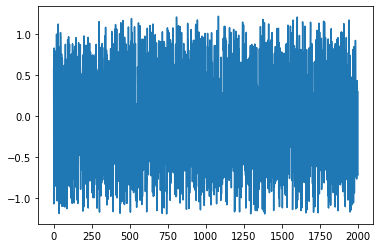

In [195]:
SinTraining.PredictTheResult()
SinTraining.PlotThePredicted_DF()

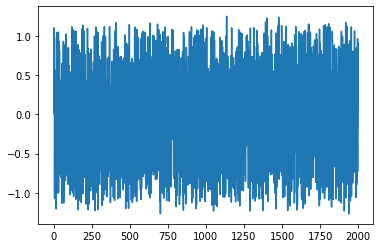

In [196]:
CosTraining.PredictTheResult()
CosTraining.PlotThePredicted_DF()

### Looks like it is not working for Sin and Cos well either. Now we will see 2^Addition and log(Addition)

In [203]:
TwoPowerTraining = Training_Tensorflow(OutputVector='2^Addition')
TwoPowerTraining.TrainTheModel(optimizer='adam',activation='selu', final_activation='exponential',epochs=250)

Train on 8000 samples
Epoch 1/250
8000/8000 [==============================] - 1s 78us/sample - loss: 21817003822.0000 - mean_squared_logarithmic_error: 12.7030
Epoch 2/250
8000/8000 [==============================] - 0s 24us/sample - loss: 4509123902.0000 - mean_squared_logarithmic_error: 11.3832
Epoch 3/250
8000/8000 [==============================] - 0s 27us/sample - loss: 1378712668.0000 - mean_squared_logarithmic_error: 6.3096
Epoch 4/250
8000/8000 [==============================] - 0s 24us/sample - loss: 1137316564.0000 - mean_squared_logarithmic_error: 3.5969
Epoch 5/250
8000/8000 [==============================] - 0s 23us/sample - loss: 538308263.0000 - mean_squared_logarithmic_error: 3.4426
Epoch 6/250
8000/8000 [==============================] - 0s 23us/sample - loss: 352477223.0000 - mean_squared_logarithmic_error: 3.4418
Epoch 7/250
8000/8000 [==============================] - 0s 23us/sample - loss: 311504246.0000 - mean_squared_logarithmic_error: 3.3916
Epoch 8/250
8000/80

8000/8000 [==============================] - 0s 20us/sample - loss: 205942756.6250 - mean_squared_logarithmic_error: 2.6509
Epoch 120/250
8000/8000 [==============================] - 0s 20us/sample - loss: 170796635.7500 - mean_squared_logarithmic_error: 2.6481
Epoch 121/250
8000/8000 [==============================] - 0s 20us/sample - loss: 162747251.0625 - mean_squared_logarithmic_error: 2.6532
Epoch 122/250
8000/8000 [==============================] - 0s 19us/sample - loss: 158087513.0000 - mean_squared_logarithmic_error: 2.6592
Epoch 123/250
8000/8000 [==============================] - 0s 20us/sample - loss: 165030994.0000 - mean_squared_logarithmic_error: 2.6596
Epoch 124/250
8000/8000 [==============================] - 0s 20us/sample - loss: 273810837.2500 - mean_squared_logarithmic_error: 2.6679
Epoch 125/250
8000/8000 [==============================] - 0s 20us/sample - loss: 248096904.5000 - mean_squared_logarithmic_error: 2.6482
Epoch 126/250
8000/8000 [=======================

8000/8000 [==============================] - 0s 20us/sample - loss: 154034640.7500 - mean_squared_logarithmic_error: 2.5334
Epoch 238/250
8000/8000 [==============================] - 0s 20us/sample - loss: 161557968.3750 - mean_squared_logarithmic_error: 2.5399
Epoch 239/250
8000/8000 [==============================] - 0s 20us/sample - loss: 224296915.5000 - mean_squared_logarithmic_error: 2.5480
Epoch 240/250
8000/8000 [==============================] - 0s 20us/sample - loss: 258196040.3750 - mean_squared_logarithmic_error: 2.5463
Epoch 241/250
8000/8000 [==============================] - 0s 20us/sample - loss: 230403218.7500 - mean_squared_logarithmic_error: 2.5343
Epoch 242/250
8000/8000 [==============================] - 0s 20us/sample - loss: 174860966.5000 - mean_squared_logarithmic_error: 2.5198
Epoch 243/250
8000/8000 [==============================] - 0s 19us/sample - loss: 155630380.5000 - mean_squared_logarithmic_error: 2.5161
Epoch 244/250
8000/8000 [=======================

In [205]:
TwoPowerTraining.PredictOneVal(A=2,B=3)

23.49

### Looks like it is not working much for this one either. Time for you to roll up tricks from your sleeves

## Now let us do classification on the final column and call it bye for this csv file. 
### To do that first we have to replace odd and even with 0 and 1 in the DF and thus we modify the class slightly.

In [144]:
class Training_Tensorflow_Classification:
    
    def __init__(self, 
                 A = Master_DF.A, 
                 B = Master_DF.B, 
                 OutputVector=None, 
                 ClassificationOrRegression="Regression"):

        Master_DF['Odd'] = np.where(Master_DF['ODD_OR_EVEN(CEIL(A+B))']=="Odd",1,0)
        Master_DF['Even'] = np.where(Master_DF['ODD_OR_EVEN(CEIL(A+B))']=="Even",1,0)
        self.Master_DF_Classification = Master_DF.copy()
        self.A = A
        self.B = B
        self.OutputVector = OutputVector
        self.TypeOfTraining = ClassificationOrRegression
        self.Training_DF = None
        self.Test_DF = None
        self.Model = None
        self.Predicted_DF = None
        self.TrainTestSplit()
        
    def TrainTestSplit(self, TestFractionSize=0.2):
        self.Training_DF, self.Test_DF = train_test_split(self.Master_DF_Classification, test_size=TestFractionSize)
        
        
    def TrainTheModel(self, 
                      DenseNodeSize = 2000, 
                      batch_size=500, 
                      epochs=25, 
                      activation='linear',
                      optimizer='sgd', 
                      loss='binary_crossentropy',
                      final_activation='linear'):
        self.Model = tf.keras.Sequential()
        self.Model.add(keras.layers.Dense(DenseNodeSize, activation=activation))
        self.Model.add(keras.layers.Dense(DenseNodeSize/10, activation=activation))
        self.Model.add(keras.layers.Dense(DenseNodeSize/100, activation=activation))
#         self.Model.add(keras.layers.Activation(activation=final_activation))
        self.Model.add(keras.layers.Dense(2, activation=final_activation))
        self.Model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
        xs = np.array([(a,b) for a,b in zip(self.Training_DF.A,self.Training_DF.B)])
        ys = np.array([(a,b) for a,b in zip(self.Training_DF['Odd'],self.Training_DF['Even'])])
        self.Model.fit(xs,ys,batch_size=batch_size,epochs=epochs)
        
    def PredictTheResult(self):
        self.Predicted_DF = pd.DataFrame(columns=['InputVals','PredictedVals','Difference'],dtype='float')
        self.Predicted_DF.InputVals = np.apply_along_axis(lambda x: np.argmax(x), 1,self.Test_DF[self.OutputVector])
        xs = np.array([(a,b) for a,b in zip(self.Test_DF.A,self.Test_DF.B)])
        self.Predicted_DF.PredictedVals = np.apply_along_axis(lambda x: np.argmax(x), 1, self.Model.predict(xs)[:len(self.Test_DF)])
        self.Predicted_DF.Difference = self.Predicted_DF.InputVals - self.Predicted_DF.PredictedVals
        
    def PredictOneVal(self, A=None, B=None):
        return np.round(self.Model.predict(np.array([[A,B]]))[0],2)
    
    def PlotThePredicted_DF(self):
        plt.figure()
        plt.plot(range(len(self.Test_DF)),self.Predicted_DF.Difference)
        plt.show()

In [145]:
OddEvenTraining = Training_Tensorflow_Classification(OutputVector=['Odd','Even'])
OddEvenTraining.TrainTheModel(final_activation='sigmoid',activation='tanh',optimizer='adam',epochs=500)

Train on 8000 samples
Epoch 1/500
8000/8000 [==============================] - 1s 92us/sample - loss: 0.7484 - accuracy: 0.5013
Epoch 2/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.6953 - accuracy: 0.5098
Epoch 3/500
8000/8000 [==============================] - 0s 43us/sample - loss: 0.6954 - accuracy: 0.5009
Epoch 4/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.6939 - accuracy: 0.5167
Epoch 5/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.6951 - accuracy: 0.5026
Epoch 6/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.6937 - accuracy: 0.5092
Epoch 7/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.6940 - accuracy: 0.5066
Epoch 8/500
8000/8000 [==============================] - 0s 42us/sample - loss: 0.6930 - accuracy: 0.5130
Epoch 9/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.6929 - accuracy: 0.5147
Epoch 10/500
8000/8000 [

8000/8000 [==============================] - 0s 42us/sample - loss: 0.6255 - accuracy: 0.5836
Epoch 78/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.6255 - accuracy: 0.5837
Epoch 79/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.6230 - accuracy: 0.5838
Epoch 80/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.6165 - accuracy: 0.5943
Epoch 81/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.6092 - accuracy: 0.6004
Epoch 82/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.6137 - accuracy: 0.5981
Epoch 83/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.6036 - accuracy: 0.6047
Epoch 84/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.6031 - accuracy: 0.6055
Epoch 85/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.5989 - accuracy: 0.6161
Epoch 86/500
8000/8000 [==========================

8000/8000 [==============================] - 0s 42us/sample - loss: 0.3989 - accuracy: 0.7409
Epoch 154/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.4005 - accuracy: 0.7436
Epoch 155/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3983 - accuracy: 0.7458
Epoch 156/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.4086 - accuracy: 0.7434
Epoch 157/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.4197 - accuracy: 0.7442
Epoch 158/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.4109 - accuracy: 0.7369
Epoch 159/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3996 - accuracy: 0.7386
Epoch 160/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3841 - accuracy: 0.7524
Epoch 161/500
8000/8000 [==============================] - 0s 39us/sample - loss: 0.3853 - accuracy: 0.7567
Epoch 162/500
8000/8000 [=================

Epoch 229/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3181 - accuracy: 0.8061
Epoch 230/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3273 - accuracy: 0.7988
Epoch 231/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3159 - accuracy: 0.8072
Epoch 232/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3262 - accuracy: 0.8068
Epoch 233/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3175 - accuracy: 0.8125
Epoch 234/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3064 - accuracy: 0.8237
Epoch 235/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.2982 - accuracy: 0.8199
Epoch 236/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3090 - accuracy: 0.8111
Epoch 237/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3191 - accuracy: 0.8034
Epoch 238/500
8000/8000 [===

8000/8000 [==============================] - 0s 43us/sample - loss: 0.2842 - accuracy: 0.8316
Epoch 305/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.2805 - accuracy: 0.8308
Epoch 306/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.2806 - accuracy: 0.8296
Epoch 307/500
8000/8000 [==============================] - 0s 39us/sample - loss: 0.2863 - accuracy: 0.8255
Epoch 308/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.2846 - accuracy: 0.8307
Epoch 309/500
8000/8000 [==============================] - 0s 42us/sample - loss: 0.2740 - accuracy: 0.8307
Epoch 310/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.2713 - accuracy: 0.8365
Epoch 311/500
8000/8000 [==============================] - 0s 42us/sample - loss: 0.2736 - accuracy: 0.8304
Epoch 312/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.2778 - accuracy: 0.8307
Epoch 313/500
8000/8000 [=================

Epoch 380/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.2375 - accuracy: 0.8591
Epoch 381/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.2315 - accuracy: 0.8587
Epoch 382/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.2417 - accuracy: 0.8497
Epoch 383/500
8000/8000 [==============================] - 0s 39us/sample - loss: 0.2409 - accuracy: 0.8546
Epoch 384/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.2304 - accuracy: 0.8602
Epoch 385/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.2331 - accuracy: 0.8628
Epoch 386/500
8000/8000 [==============================] - 0s 40us/sample - loss: 0.2304 - accuracy: 0.8616
Epoch 387/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.2332 - accuracy: 0.8614
Epoch 388/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.2398 - accuracy: 0.8563
Epoch 389/500
8000/8000 [===

8000/8000 [==============================] - 0s 42us/sample - loss: 0.2275 - accuracy: 0.8597
Epoch 456/500
8000/8000 [==============================] - 0s 41us/sample - loss: 0.2201 - accuracy: 0.8712
Epoch 457/500
8000/8000 [==============================] - 0s 43us/sample - loss: 0.2231 - accuracy: 0.8679
Epoch 458/500
8000/8000 [==============================] - 0s 42us/sample - loss: 0.2384 - accuracy: 0.8611
Epoch 459/500
8000/8000 [==============================] - 0s 43us/sample - loss: 0.2367 - accuracy: 0.8568
Epoch 460/500
8000/8000 [==============================] - 0s 48us/sample - loss: 0.2263 - accuracy: 0.8648
Epoch 461/500
8000/8000 [==============================] - 0s 43us/sample - loss: 0.2307 - accuracy: 0.8556
Epoch 462/500
8000/8000 [==============================] - 0s 43us/sample - loss: 0.2198 - accuracy: 0.8691
Epoch 463/500
8000/8000 [==============================] - 0s 43us/sample - loss: 0.2153 - accuracy: 0.8724
Epoch 464/500
8000/8000 [=================

In [146]:
OddEvenTraining.PredictOneVal(A=1.3,B=1.77)

array([0.01, 0.99], dtype=float32)

In [147]:
OddEvenTraining.PredictOneVal(A=1.5,B=4.6)

array([0.99, 0.  ], dtype=float32)

In [148]:
OddEvenTraining.PredictTheResult()

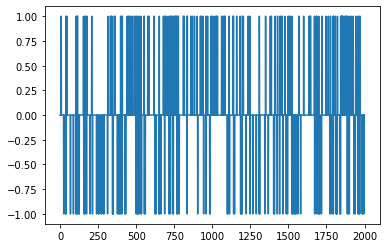

In [149]:
OddEvenTraining.PlotThePredicted_DF()